In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [14]:
def count_cate(x):
    if x <=10:
        return 'Very Low Volume'
    elif x>10 and x <=50:
        return 'Low Volume'
    elif x>50 and x <=100:
        return 'Moderate Volume'
    elif x >100 and x<=300:
        return 'High Day'
    elif x>300 and x <=1000:
        return 'Very High Day'
    elif x >1000:
        return 'Extreme High'

In [15]:
df['count_cate'] = df['count'].apply(count_cate)

In [16]:
df.head(5)

datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count       count_cate  
0        81        0.0       3          13     16       Low Volume  
1        80        0.0       8          32     40       Low Volume  
2        80        0.0       5          27     32       Low Volume  
3        75        0.0       3          10     13       Low Volume  
4        75        0.0       0           1      1  Very Low Volume

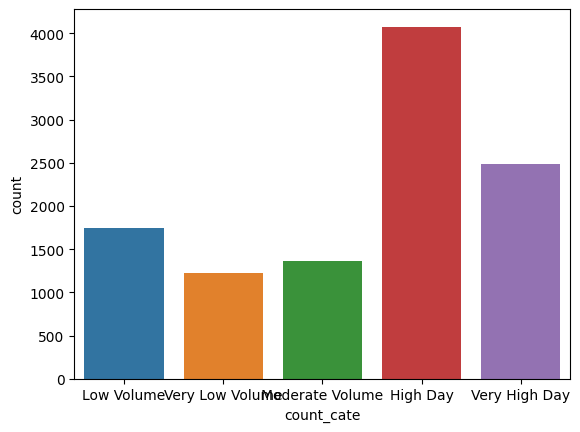

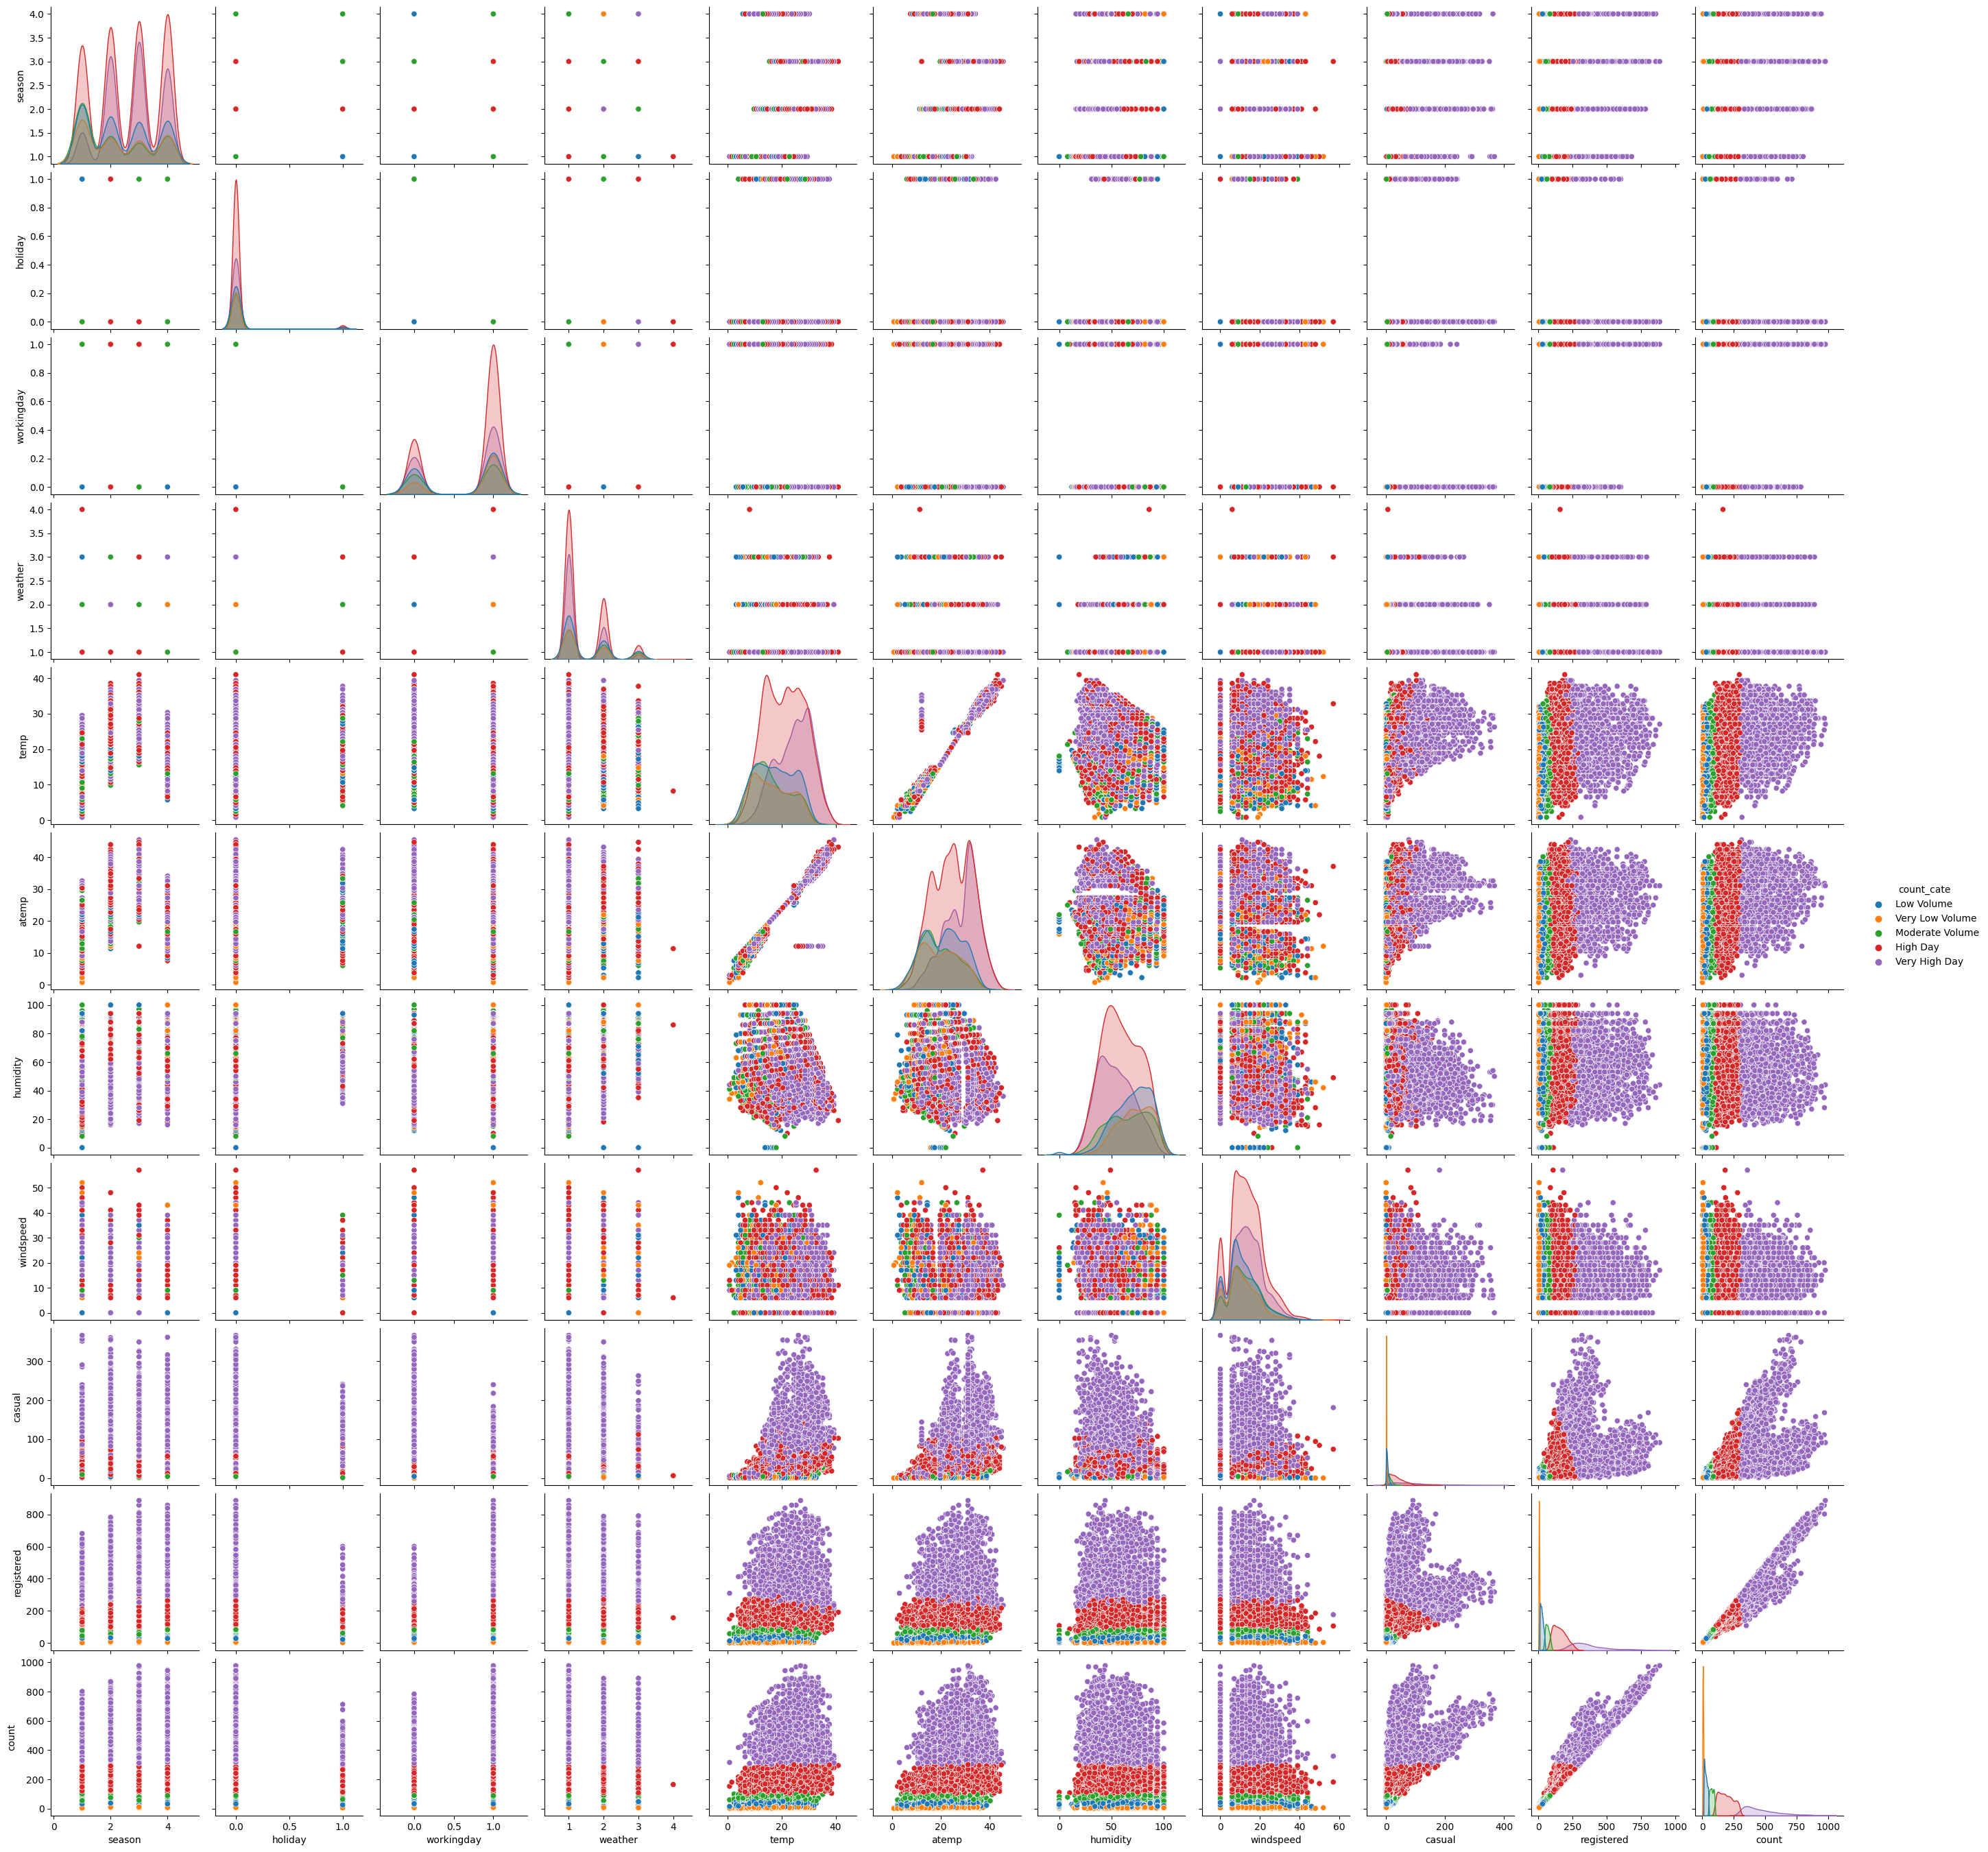

In [17]:
sns.countplot(x='count_cate', data=df)
plt.show()
sns.pairplot(df, hue='count_cate')
plt.show()

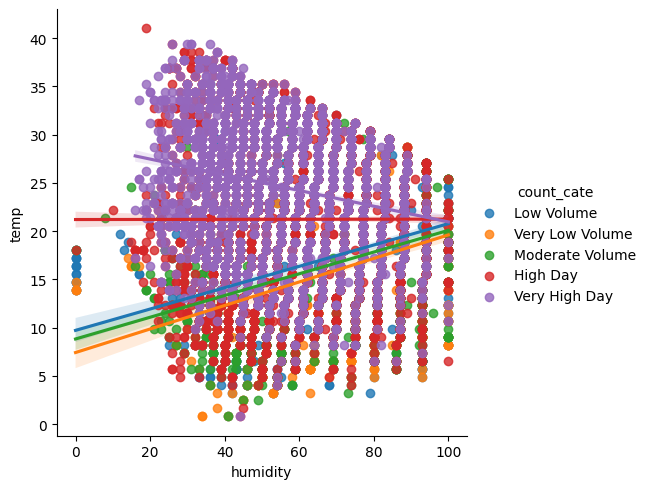

In [20]:
sns.lmplot(x='humidity', y='temp', hue = 'count_cate', data=pd)

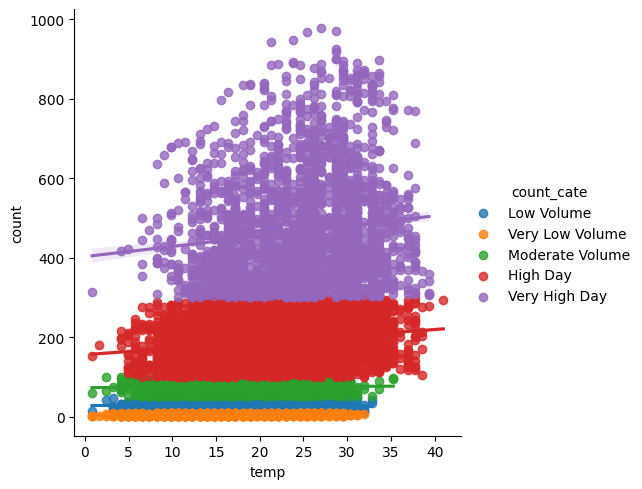

In [22]:
sns.lmplot(x='temp', y='count', hue = 'count_cate', data=df)

In [ ]:
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [30]:
cat_columns = ['season','holiday','workingday','weather']
num_columns = ['temp','humidity','windspeed','casual','count']
target = 'count_cate'

In [32]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [36]:
df.groupby('weather').count()

datetime  season  holiday  workingday  temp  atemp  humidity   
weather                                                                 
1            7192    7192     7192        7192  7192   7192      7192  \
2            2834    2834     2834        2834  2834   2834      2834   
3             859     859      859         859   859    859       859   
4               1       1        1           1     1      1         1   

         windspeed  casual  registered  count  count_cate  
weather                                                    
1             7192    7192        7192   7192        7192  
2             2834    2834        2834   2834        2834  
3              859     859         859    859         859  
4                1       1           1      1           1

In [34]:
x_train_transformed.shape

(8708, 17)

In [35]:
x_test_transformed.shape

(2178, 16)